In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('loan_data.csv')
data_frame

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df = data_frame.copy()

In [7]:
df.shape

(45000, 14)

In [6]:
print(f'Description of the dataset is :\n{df.describe()}Information of the dataset is :\n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# **Checking for null values and duplicate data**

In [9]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

# **Encoding the Categorical data**

In [14]:
encoder = OrdinalEncoder()
df['person_gender'] = encoder.fit_transform(df[['person_gender']])

In [15]:
df.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0


In [16]:
df['person_education'].nunique()

5

In [17]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [18]:
df['person_education']=encoder.fit_transform(df[['person_education']])

In [21]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.0,4.0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0.0,3.0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,0.0,3.0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,0.0,1.0,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,1.0,4.0,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [20]:
def encode_categorical_data(categorical_data):
    for i in categorical_data:
        df[i] = encoder.fit_transform(df[[i]])

    print(f'Data encoded successfully :)\n{df.info()}')

In [24]:
categorical_data = ['person_home_ownership','loan_intent','previous_loan_defaults_on_file']
categorical_data

['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [25]:
encode_categorical_data(categorical_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  float64
 2   person_education                45000 non-null  float64
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  float64
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  float64
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [26]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.0,4.0,71948.0,0,3.0,35000.0,4.0,16.02,0.49,3.0,561,0.0,1
1,21.0,0.0,3.0,12282.0,0,2.0,1000.0,1.0,11.14,0.08,2.0,504,1.0,0
2,25.0,0.0,3.0,12438.0,3,0.0,5500.0,3.0,12.87,0.44,3.0,635,0.0,1
3,23.0,0.0,1.0,79753.0,0,3.0,35000.0,3.0,15.23,0.44,2.0,675,0.0,1
4,24.0,1.0,4.0,66135.0,1,3.0,35000.0,3.0,14.27,0.53,4.0,586,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1.0,0.0,47971.0,6,3.0,15000.0,3.0,15.66,0.31,3.0,645,0.0,1
44996,37.0,0.0,0.0,65800.0,17,3.0,9000.0,2.0,14.07,0.14,11.0,621,0.0,1
44997,33.0,1.0,0.0,56942.0,7,3.0,2771.0,0.0,10.02,0.05,10.0,668,0.0,1
44998,29.0,1.0,1.0,33164.0,4,3.0,12000.0,1.0,13.23,0.36,6.0,604,0.0,1


In [29]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [36]:
X

array([[-0.95353824, -1.11006918,  1.52526448, ..., -0.73910854,
        -1.41981408, -1.01603973],
       [-1.11896309, -1.11006918,  0.84919205, ..., -0.99686317,
        -2.5499748 ,  0.98421348],
       [-0.45726369, -1.11006918,  0.84919205, ..., -0.73910854,
         0.04741211, -1.01603973],
       ...,
       [ 0.8661351 ,  0.90084476, -1.17902525, ...,  1.06517387,
         0.70171569, -1.01603973],
       [ 0.2044357 ,  0.90084476, -0.50295282, ...,  0.03415535,
        -0.5672367 , -1.01603973],
       [-0.62268854,  0.90084476,  0.84919205, ..., -0.73910854,
        -0.09137955, -1.01603973]], shape=(45000, 13))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
Regression_model = LogisticRegression()
Regression_model.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_train_pred = Regression_model.predict(X_train)
y_test_pred = Regression_model.predict(X_test)

print(f'Training accuracy of the model is : {round(accuracy_score(y_train,y_train_pred),2)*100}%')
print(f'Test Accuracy of the model is :{round(accuracy_score(y_test,y_test_pred),2)*100}%')

Training accuracy of the model is : 89.0%
Test Accuracy of the model is :89.0%


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)*100}')
print(f'F1-Score: {f1_score(y_train, y_train_pred)}')


Precision: 0.7668730650154799
Recall: 73.99551904406273
F1-Score: 0.753173698213607


In [115]:
svm_model = SVC(degree=2)
svm_model.fit(X_train,y_train)

SVC(degree=2)

In [116]:
svm_y_train = svm_model.predict(X_train)
svm_y_test = svm_model.predict(X_test)

print(f'Training accuracy of the model is : {round(accuracy_score(y_train,svm_y_train),2)*100}%')
print(f'Test Accuracy of the model is :{round(accuracy_score(y_test,svm_y_test),2)*100}%')

Training accuracy of the model is : 91.0%
Test Accuracy of the model is :91.0%


In [58]:
svm_y_pred_train = svm_model.predict(X_train)
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)*100}')
print(f'F1-Score: {f1_score(y_train, y_train_pred)}')


Precision: 0.7668730650154799
Recall: 73.99551904406273
F1-Score: 0.753173698213607


In [117]:
model_tree = DecisionTreeClassifier(max_depth=4,random_state=2)
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=2)

In [118]:
dty_train_pred = model_tree.predict(X_train)
dty_test_pred = model_tree.predict(X_test)

print(f'Training accuracy of the model is : {round(accuracy_score(y_train,dty_train_pred),2)*100}%')
print(f'Test Accuracy of the model is :{round(accuracy_score(y_test,dty_test_pred),2)*100}%')

Training accuracy of the model is : 91.0%
Test Accuracy of the model is :91.0%


In [112]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(max_depth=5,min_samples_split=3)

In [113]:
randomForest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [114]:
rdmy_train_pred = randomForest.predict(X_train)
rdmy_test_pred = randomForest.predict(X_test)

print(f'Training accuracy of the model is : {round(accuracy_score(y_train,rdmy_train_pred),2)*100}%')
print(f'Test Accuracy of the model is :{round(accuracy_score(y_test,rdmy_test_pred),2)*100}%')


Training accuracy of the model is : 91.0%
Test Accuracy of the model is :91.0%


# **Checking for outlier**

In [120]:
def outliers(df):
    for i in df:
        sns.boxplot(df[i],color='r')

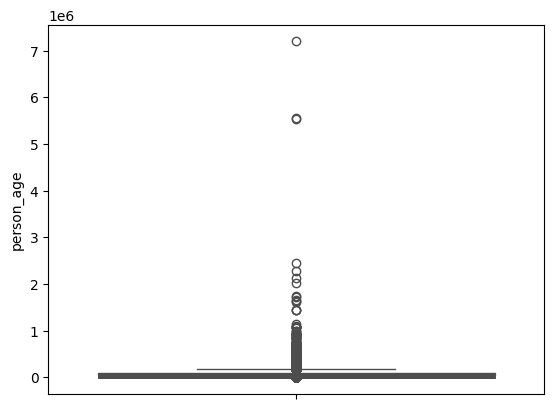

In [121]:
outliers(df)

<Axes: ylabel='person_income'>

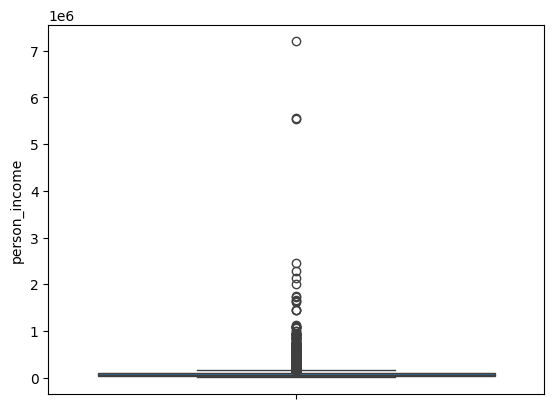

In [122]:
sns.boxplot(df['person_income'])

In [125]:
df.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.017528,-0.014649,0.193698,0.954412,-0.039008,0.050750,0.032005,0.013402,-0.043299,0.861985,0.178432,-0.025917,-0.021476
person_gender,0.017528,1.000000,-0.002267,0.010173,0.015078,-0.001172,0.010647,-0.003107,0.003662,-0.000367,0.011999,-0.000223,0.000704,-0.000561
person_education,-0.014649,-0.002267,1.000000,0.000331,-0.012034,-0.000290,-0.002441,0.004356,0.000336,-0.006984,-0.014576,0.012498,-0.002669,-0.001747
person_income,0.193698,0.010173,0.000331,1.000000,0.185987,-0.219870,0.242290,0.008639,0.001510,-0.234177,0.124316,0.035919,0.061483,-0.135808
person_emp_exp,0.954412,0.015078,-0.012034,0.185987,1.000000,-0.035884,0.044589,0.031230,0.016631,-0.039862,0.824272,0.186196,-0.029231,-0.020481
person_home_ownership,-0.039008,-0.001172,-0.000290,-0.219870,-0.035884,1.000000,-0.150243,0.001828,0.130437,0.148933,-0.029549,-0.006421,-0.125974,0.233842
loan_amnt,0.050750,0.010647,-0.002441,0.242290,0.044589,-0.150243,1.000000,-0.001068,0.146093,0.593011,0.042969,0.009074,-0.059009,0.107714
loan_intent,0.032005,-0.003107,0.004356,0.008639,0.031230,0.001828,-0.001068,1.000000,-0.005372,0.003269,0.030912,0.016244,0.038469,-0.072158
loan_int_rate,0.013402,0.003662,0.000336,0.001510,0.016631,0.130437,0.146093,-0.005372,1.000000,0.125209,0.018008,0.011498,-0.181800,0.332005
loan_percent_income,-0.043299,-0.000367,-0.006984,-0.234177,-0.039862,0.148933,0.593011,0.003269,0.125209,1.000000,-0.031868,-0.011483,-0.203252,0.384880
